# Step 1: Installation and Setup

In [1]:
# Installing TensorFlow
! pip install -q tensorflow-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 23.1.4 which is incompatible.
tensorflow 2.9.2 requires keras<2.10.0,>=2.9.0rc0, but you have keras 2.11.0 which is incompatible.
tensorflow 2.9.2 requires tensorboard<2.10,>=2.9, but you have tensorboard 2.11.0 which is incompatible.
tensorflow 2.9.2 requires tensorflow-estimator<2.10.0,>=2.9.0rc0, but you have tensorflow-estimator 2.11.0 which is incompatible.


In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.11.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [5]:
# importing the libraries
from tensorflow.keras.datasets import imdb #DATASET
from tensorflow.keras.preprocessing.sequence import pad_sequences #FOR PREPROCESSING

In [6]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)
#above we are taking most frequent 20000 words.

17464789/17464789 [==============================] - 0s 0us/step


In [7]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [8]:
# apply padding - to make all reviews of fixed length.
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

In [10]:
x_train.shape, x_test.shape
#25000 reviews are in x_test and x_train.100 or 100 words is the length of review
#which was fixed above.

((25000, 100), (25000, 100))

# Step 3: Building the model

In [11]:
# define an object (initializing RNN)
model = tf.keras.models.Sequential()

In [12]:
# Embedding layer - to compress input feature space into smaller one.
#it transforms words into corresponding words embeddings.
model.add(tf.keras.layers.Embedding(input_dim=20000, output_dim=128, input_shape=(100,)))
#embedding layer can only be used as 1st layer in model.
#input dimension has to be equal to no. of unique words.

In [13]:
# LSTM layer -- LONGEST SHORT TERM MEMORY.
#LSTM layer is used to understand relationship between different elements of sequence.
#here LSTM Layer is used to understand the relationship between different words in reviews.
model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))
#for LSTM layer units means no. of cells. 
#tanh is default activation function here.

In [14]:
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
#we have binary output so we use sigmoid activation function.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [16]:
# compile the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Training the model

In [17]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
196/196 [==============================] - 129s 648ms/step - loss: 0.5407 - accuracy: 0.7184 - val_loss: 0.4686 - val_accuracy: 0.7999
Epoch 2/5
196/196 [==============================] - 120s 616ms/step - loss: 0.3462 - accuracy: 0.8534 - val_loss: 0.3809 - val_accuracy: 0.8318
Epoch 3/5
196/196 [==============================] - 111s 565ms/step - loss: 0.2865 - accuracy: 0.8851 - val_loss: 0.3467 - val_accuracy: 0.8497
Epoch 4/5
196/196 [==============================] - 120s 612ms/step - loss: 0.2421 - accuracy: 0.9076 - val_loss: 0.6657 - val_accuracy: 0.7906
Epoch 5/5
196/196 [==============================] - 120s 612ms/step - loss: 0.2139 - accuracy: 0.9209 - val_loss: 0.3615 - val_accuracy: 0.8410


In [23]:
# predictions
#y_pred = model.predict_classes(x_test)
y_pred = np.argmax(model.predict(x_test), axis=1)

782/782 [==============================] - 58s 74ms/step


In [37]:
print(y_pred[1]), print(y_test[1])

[0.9285117]
1


(None, None)

In [30]:
model.evaluate(x_test,y_test) #1st value is loss and 2nd value is accuracy.

782/782 [==============================] - 55s 71ms/step - loss: 0.3615 - accuracy: 0.8410


[0.36152714490890503, 0.8409600257873535]

In [31]:
x_new=x_test[:6] #taking 5 values with indices 0,1,2,3,4,5. 

In [32]:
y_pred=model.predict(x_new)

1/1 [==============================] - 0s 67ms/step


In [33]:
y_pred

array([[0.32818538],
       [0.9285117 ],
       [0.5849714 ],
       [0.59483075],
       [0.9889655 ],
       [0.8828335 ]], dtype=float32)

In [34]:
y_test[:6]

array([0, 1, 1, 0, 1, 1])

In [36]:
y_pred.round(0)

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

# Step 5: Learning Curve

In [38]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

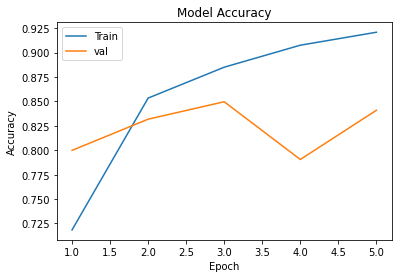

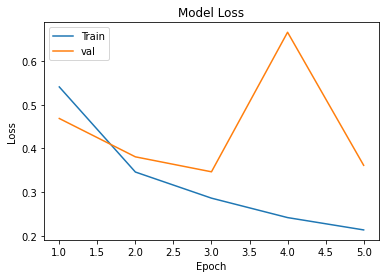

In [40]:
learning_curve(history, 5)

In [41]:
#since training accuracy > validation accuracy so model is overfitted.
#since training loss decreases continuously and validation loss increases.So we
#conclude that our model has learnt too much from training data. 
#Hence overfitting occurs.

In [42]:
#OUTPUT LABEL IS OF 2 TYPES: 1)POSITIVE REVIEW , 2)NEGATIVE REVIEW .